In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ejblocks = gpd.read_file("../data/joins/ejblocks.shp.zip")

## MANOVA

In [3]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('AC_5 + AC_10 + AC_15 + AC_20 + AC_30 + AC_45 + AC_60 ~ TC', data=ejblocks)
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9795 7.0000 47130.0000 141.2455 0.0000
         Pillai's trace 0.0205 7.0000 47130.0000 141.2455 0.0000
 Hotelling-Lawley trace 0.0210 7.0000 47130.0000 141.2455 0.0000
    Roy's greatest root 0.0210 7.0000 47130.0000 141.2455 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            TC           Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9988 7.0000 47130.0000  8.2736 0.0000
          Pillai's trace 0.0012 7.0000 47130.

## Creating Boolean Columns

In [4]:
cols = ["AC_5","AC_10","AC_15","AC_20","AC_30","AC_45","AC_60"]
cols_bools = [col+"_bool" for col in cols]

In [5]:
ejblocks["TC_bool"] = ejblocks["TC"] > 0
for i in range(len(cols)):
    if i == 0:
        ejblocks[cols_bools[i]] = ejblocks[cols[i]] == 0
    else:
        ejblocks[cols_bools[i]] = (ejblocks[cols[i]] == 0) & ejblocks[cols_bools[i-1]]

In [6]:
ejblocks[cols_bools].head(10)

,AC_5_bool,AC_10_bool,AC_15_bool,AC_20_bool,AC_30_bool,AC_45_bool,AC_60_bool
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


## 10-Minute Walk Analysis

In [7]:
tab = pd.crosstab(ejblocks["TC_bool"], ejblocks["AC_10_bool"], ejblocks["P1_001N"], aggfunc='sum')
table = sm.stats.Table2x2(tab)

print("Total Values:", int(np.sum(tab.values)))
print(table.table_orig)
print(table.summary())
print(table.test_nominal_association())
print("Probability of No Conserved Land w/in 10-Minute Walk:", table.marginal_probabilities[1])

Total Values: 1362359
AC_10_bool     False     True 
AC_10_bool                    
False       257017.0  733056.0
True         77683.0  294603.0
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.330       1.318 1.342   0.000
Log odds ratio    0.285 0.005 0.276 0.294   0.000
Risk ratio        1.244       1.235 1.253   0.000
Log risk ratio    0.218 0.004 0.211 0.225   0.000
-------------------------------------------------
df          1
pvalue      0.0
statistic   3786.722929514167
Probability of No Conserved Land w/in 10-Minute Walk: AC_10_bool
False    0.245677
True     0.754323
dtype: float64


(-7936394.985439143, -7422284.928615487, 5263461.463094186, 6053360.48906883)

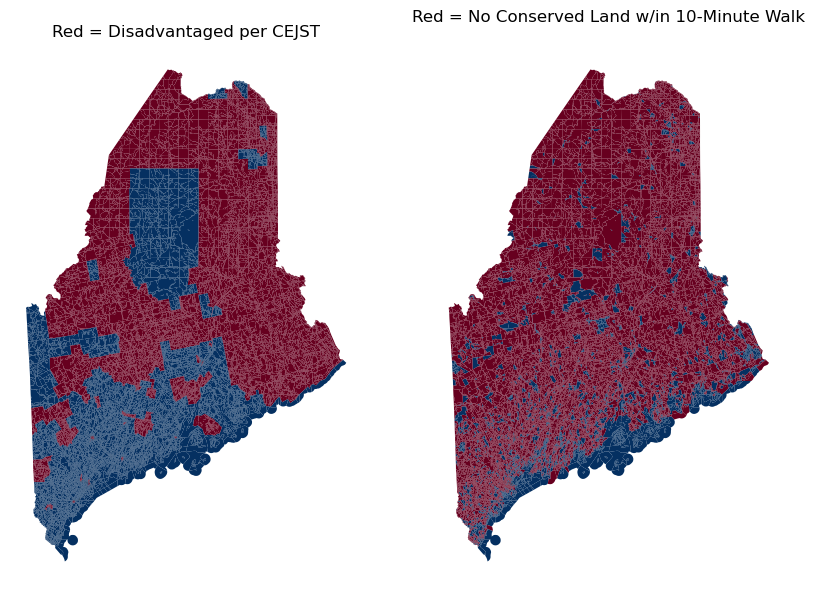

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
ejblocks.plot("TC_bool", cmap="RdBu_r", ax=axs[0])
ejblocks.plot("AC_10_bool", cmap="RdBu_r", ax=axs[1])
axs[0].set_title("Red = Disadvantaged per CEJST")
axs[1].set_title("Red = No Conserved Land w/in 10-Minute Walk")
axs[0].axis("off")
axs[1].axis("off")

## 60-Minute Walk Analysis

In [9]:
tab = pd.crosstab(ejblocks["TC_bool"], ejblocks["AC_60_bool"], ejblocks["P1_001N"], aggfunc='sum')
table = sm.stats.Table2x2(tab)

print("Total Values:", int(np.sum(tab.values)))
print(table.table_orig)
print(table.summary())
print(table.test_nominal_association())
print(*table.marginal_probabilities)
print("Probability of No Conserved Land w/in 60-Minute Walk:", table.marginal_probabilities[1])

Total Values: 1362359
AC_60_bool     False     True 
AC_60_bool                    
False       896336.0   93737.0
True        271449.0  100837.0
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        3.552       3.517 3.587   0.000
Log odds ratio    1.268 0.005 1.258 1.277   0.000
Risk ratio        1.242       1.239 1.244   0.000
Log risk ratio    0.216 0.001 0.214 0.218   0.000
-------------------------------------------------
df          1
pvalue      0.0
statistic   68597.98863767541
AC_60_bool
False    0.726734
True     0.273266
dtype: float64 AC_60_bool
False    0.857179
True     0.142821
dtype: float64
Probability of No Conserved Land w/in 60-Minute Walk: AC_60_bool
False    0.857179
True     0.142821
dtype: float64


(-7936394.985439143, -7422284.928615487, 5263461.463094186, 6053360.48906883)

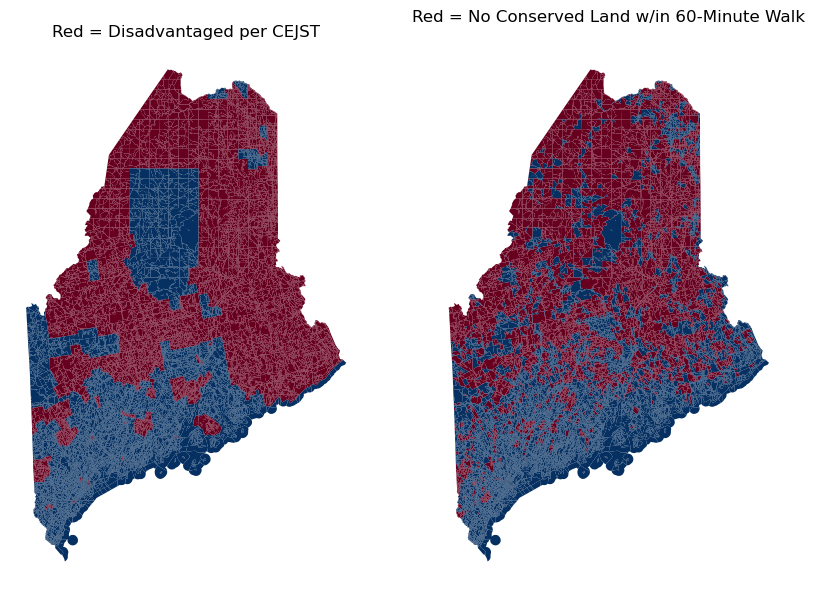

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
ejblocks.plot("TC_bool", cmap="RdBu_r", ax=axs[0])
ejblocks.plot("AC_60_bool", cmap="RdBu_r", ax=axs[1])
axs[0].set_title("Red = Disadvantaged per CEJST")
axs[1].set_title("Red = No Conserved Land w/in 60-Minute Walk")
axs[0].axis("off")
axs[1].axis("off")

## Checking Population and Population Density Effects

In [11]:
fit = MANOVA.from_formula('AC_10 + AC_60 ~ TC + P1_001N + POPDENSE + TC*POPDENSE + TC*P1_001N', data=ejblocks)
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9939 2.0000 43172.0000 132.8277 0.0000
         Pillai's trace 0.0061 2.0000 43172.0000 132.8277 0.0000
 Hotelling-Lawley trace 0.0062 2.0000 43172.0000 132.8277 0.0000
    Roy's greatest root 0.0062 2.0000 43172.0000 132.8277 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            TC           Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9993 2.0000 43172.0000 15.9424 0.0000
          Pillai's trace 0.0007 2.0000 43172.

## Plots

In [12]:
percents = ejblocks.groupby("TC_bool")[cols_bools].sum() / ejblocks.groupby("TC_bool")[cols_bools].count()
percents = percents.melt(ignore_index=False).reset_index()
percents

,TC_bool,variable,value
0,False,AC_5_bool,0.825040
1,True,AC_5_bool,0.902414
2,False,AC_10_bool,0.706164
3,True,AC_10_bool,0.845135
4,False,AC_15_bool,0.595310
5,True,AC_15_bool,0.795399
6,False,AC_20_bool,0.502623
7,True,AC_20_bool,0.751980
8,False,AC_30_bool,0.359832
9,True,AC_30_bool,0.666557


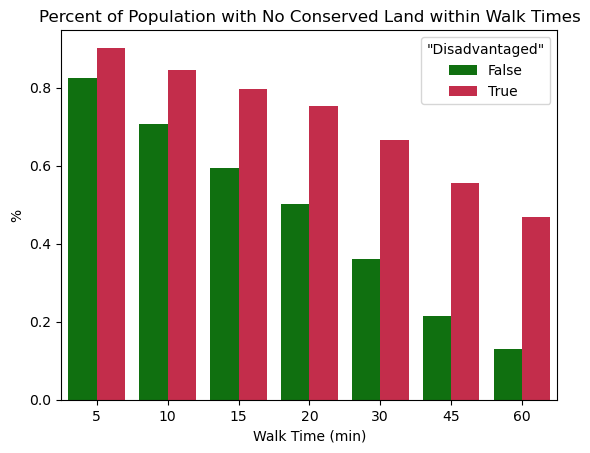

In [13]:
ax = sns.barplot(
    percents,
    x="variable",
    y="value",
    hue="TC_bool",
    errorbar=None,
    palette={True:"crimson",False:"green"}
    )
ax.set_title("Percent of Population with No Conserved Land within Walk Times")
ax.set_ylabel("%")
ax.set_xlabel("Walk Time (min)")
ax.set_xticklabels([label.get_text().split("_")[1] for label in ax.get_xticklabels()])
ax.legend(title="\"Disadvantaged\"")